<a href="https://colab.research.google.com/github/Sugunavelliyangiri/Suguna-project/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head(20)

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (4).csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#data cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Remove duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())

# Remove rows with missing TotalCharges (or convert to numeric and drop NaNs)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Verify corrections
print(df.info())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 


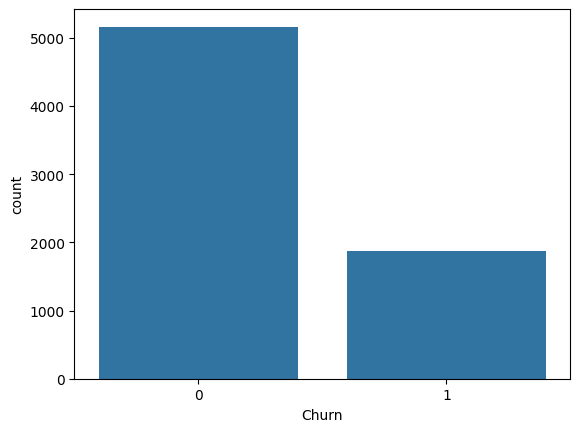

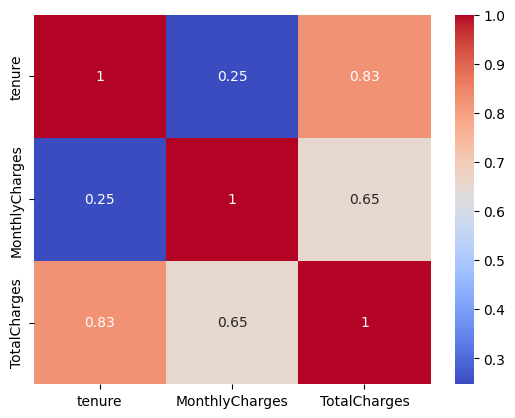

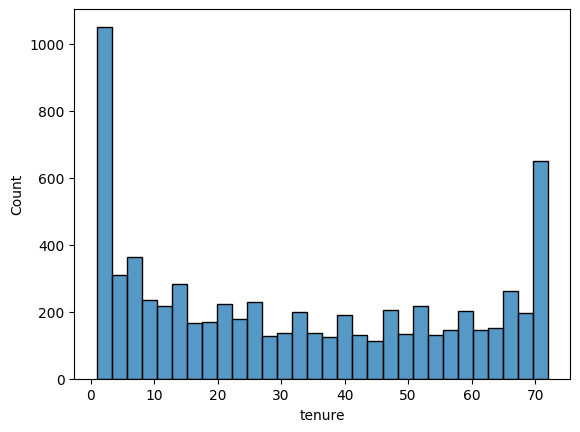

In [48]:
#EDA
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.show()

# Correlation heatmap (for numerical features)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()

# Histogram for tenure
sns.histplot(df['tenure'], bins=30)
plt.show()

In [47]:
#feature engineering
# Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    elif tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'

df['tenure_group'] = df['tenure'].apply(tenure_group)

# Encode categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,5524,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0


In [49]:
#Model building

# Define features and target
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [50]:
#model evaluation
# Predict
models = {'Logistic Regression': log_reg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} Precision: {precision_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print('-'*50)

Logistic Regression Accuracy: 0.79
Logistic Regression Precision: 0.62
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

--------------------------------------------------
Decision Tree Accuracy: 0.72
Decision Tree Precision: 0.47
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

--------------------------------------------------
Random Forest Accuracy: 0.79
Random Forest Precision: 0.63
              precision    recall  f1-score   support



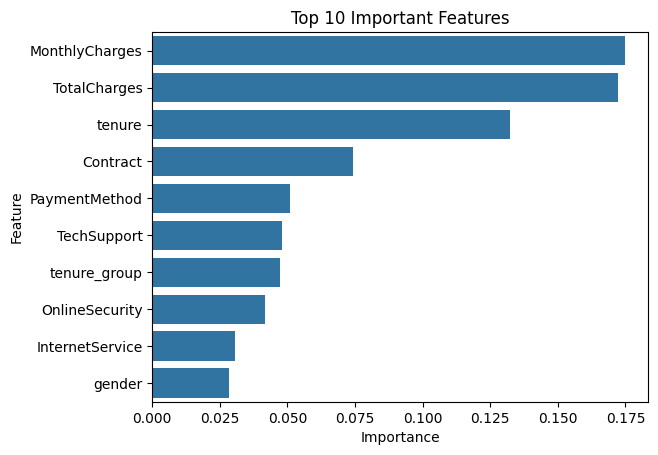

In [51]:
#Visualization
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()